# R SWAT - Native R Interface to SAS Viya

This R notebook is part of a workflow that starts in SAS Studio with Readmissions_Studio.sas, which handles data prep and a modeling example. R SWAT (SAS Scripting Wrapper for Analytics Transfer) allows the user to create the same machine learning process on the same data set. 

### Load SWAT and Other R Libraries; Connect CAS Session

In [1]:
library(swat)
library(getPass)
library(tidyr)
session <- CAS("cascontroller.hlsrwe.sashq-d.openstack.sas.com", 8777, user="anddwi",password=getPass(),protocol="https")

NOTE: The extension module for binary protocol support is not available.
      Only the CAS REST interface can be used.
SWAT 1.3.0.9000


········


NOTE: Connecting to CAS and generating CAS action functions for loaded
      action sets...
NOTE: To generate the functions with signatures (for tab completion), set 
      options(cas.gen.function.sig=TRUE).


# Data Exploration

### Store CASLIB Information in an R Variable

In [2]:
currentCaslib <- 'PUBLIC'

### SWAT Functions for Table Information

In [3]:
cas.table.tableInfo(session,caslib=currentCaslib)

Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
HOSPITAL_READMISSIONS_DEMO_FACT,358431,26,0,utf-8,2018-09-04T09:02:45-04:00,2018-09-04T09:02:48-04:00,2018-09-04T12:54:16-04:00,UTF8,1851685365,...,1,0,0,,,0,sasdemo01,,,NaN
READMISSIONS_FINAL,75675,40,0,utf-8,2018-09-04T09:09:44-04:00,2018-09-04T09:09:45-04:00,2018-09-04T13:33:25-04:00,UTF8,1851685784,...,1,0,0,,,0,anddwi,,,NaN
READ_PHYSICIAN_DEMO_DIM,95864,9,0,utf-8,2018-09-04T09:10:09-04:00,2018-09-04T09:10:09-04:00,2018-09-04T13:19:07-04:00,UTF8,1851685809,...,1,0,0,,,0,anddwi,,,NaN
HOSPITAL_READMISSIONS_DEMO_ABT2,358431,34,0,utf-8,2018-09-04T09:16:57-04:00,2018-09-04T09:16:58-04:00,2018-09-04T13:27:46-04:00,UTF8,1851686217,...,1,0,0,HOSPITAL_READMISSIONS_DEMO_ABT2.sashdat,Public,0,anddwi,,2018-09-04T09:16:53-04:00,1851686213
FIRSTSITE,177,4,0,utf-8,2018-09-04T09:26:52-04:00,2018-09-04T09:26:52-04:00,2018-09-04T09:30:47-04:00,UTF8,1851686812,...,1,0,0,FIRSTSITE.sashdat,Public,0,jimbox,,2018-08-21T13:04:53-04:00,1850490293
VISITCOUNTS,750,6,0,utf-8,2018-09-04T09:27:23-04:00,2018-09-04T09:27:23-04:00,2018-09-04T09:27:40-04:00,UTF8,1851686843,...,1,0,0,,,0,jimbox,,,NaN
RANKSTACKED,24684,4,0,utf-8,2018-09-04T09:27:23-04:00,2018-09-04T09:27:23-04:00,2018-09-04T09:30:45-04:00,UTF8,1851686843,...,1,0,0,,,0,jimbox,,,NaN
RANKMILESTONES,51,18,0,utf-8,2018-09-04T09:27:23-04:00,2018-09-04T09:27:23-04:00,2018-09-04T09:27:52-04:00,UTF8,1851686843,...,1,0,0,,,0,jimbox,,,NaN
COSTLIST,51,6,0,utf-8,2018-09-04T09:27:23-04:00,2018-09-04T09:27:23-04:00,2018-09-04T12:10:34-04:00,UTF8,1851686843,...,1,0,0,,,0,jimbox,,,NaN
STACKEDCOST,153,4,0,utf-8,2018-09-04T09:27:23-04:00,2018-09-04T09:27:23-04:00,2018-09-04T09:27:23-04:00,UTF8,1851686843,...,1,0,0,,,0,jimbox,,,NaN


In [3]:
readmit_h <- defCasTable(session,caslib=currentCaslib,"readmit_imputed")

In [5]:
 head(readmit_h)

ENCOUNTER_KEY,PATIENT_NUMBER,DOCTOR,ADMIT_DATE,DISCHARGE_DATE,readmit_date,readmit_discharge_date,readmit_days,Diagnosis_Group,icd9_target,...,op_visits30,PatientAge,HOSPITAL,REGION,READMIT,_PartInd_,IM_order_set_used,IM_LENGTH_OF_STAY,IM_Num_Chronic_Cond,IM_PatientAge
105301489,9921961489,292722,18952,18967,NaN,NaN,,AMI,1,...,2,70,Hosp 4,Region 2,N,1,1,2,0,70
105301492,9921961492,275709,18825,18849,NaN,NaN,,CHF,1,...,1,72,Hosp 1,Region 1,N,1,1,24,1,72
105301495,9921961495,275709,19033,19039,19043,19049,01-07,CHF,1,...,0,73,Hosp 26,Region 8,Y,0,1,1,4,73
105301498,9921961498,220194,19031,19035,NaN,NaN,,COPD,0,...,0,71,Hosp 4,Region 2,N,1,1,14,0,71
105301501,9921961501,283030,19028,19029,NaN,NaN,,CHF,1,...,0,71,Hosp 31,Region 9,N,1,1,1,0,71
105301504,9921961504,262051,19091,19097,NaN,NaN,,CHF,1,...,0,93,Hosp 12,Region 4,Y,0,1,6,0,93


### Use a Combination of Viya and Local R

Calculate the pairwise correlations for all of the input variables. This action returns a much smaller data set than the source, so it can be easily brought back to R for analysis. Here we use our favorite R package for displaying correlation matrices, corrplot.

corrplot 0.84 loaded


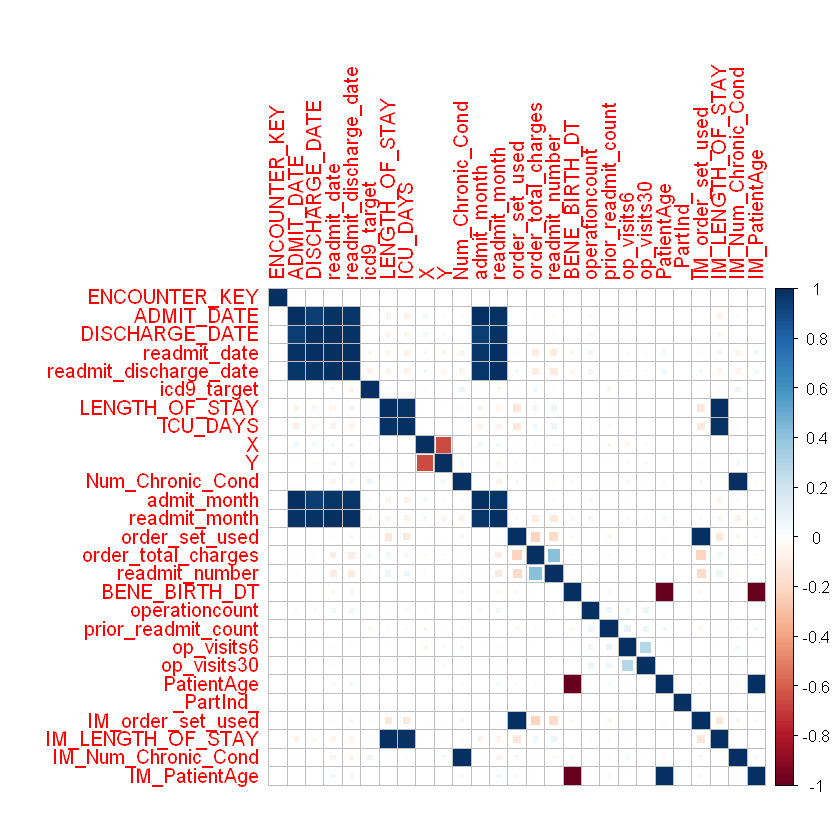

In [6]:
localCorr <- cas.simple.correlation(readmit_h)$Correlation
rownames(localCorr) <- localCorr$Variable
localCorr <- localCorr[-11,c(-1,-12)]
nvars<-as.array(dim(localCorr))[1]

library(corrplot)
corrplot(as.matrix(localCorr[,1:nvars]),method="square")

### Training and Validation Data

In [4]:
train <- defCasTable(session,caslib=currentCaslib, 'readmit_imputed', where="_PartInd_=1")
valid <- defCasTable(session,caslib=currentCaslib, 'readmit_imputed', where="_PartInd_=0")

### Variable Shortcuts

Assign in one place rather than hardcoding in modeling

In [5]:
char_input <- c("DISCHARGED_TO")
num_input   <- c('IM_LENGTH_OF_STAY', 'IM_Num_Chronic_Cond', 'IM_PatientAge', 'IM_order_set_used')
target <- 'readmit'

# Model Building

### Train Gradient Boosting Model

In [9]:
loadActionSet(session, 'decisionTree')
cas.decisionTree.gbtreeTrain(train,
                            target   = target, 
                            inputs   = c(num_input, char_input), 
                            nominals = char_input,
                            varImp   = TRUE,
                            casOut   = list(name = 'gradboost_R', replace = TRUE),
                            ntree    = 800,
                            seed     = 20,
                            nBins    = 20, 
                            maxLevel = 6, 
                            maxBranch= 2, 
                            leafSize = 5, 
                            missing  = 'USEINSEARCH', 
                            minUseInSearch=1, 
                            binOrder=TRUE
)

NOTE: Added action set 'decisionTree'.
NOTE: Information for action set 'decisionTree':
NOTE:    decisionTree
NOTE:       dtreeTrain - Trains a decision tree
NOTE:       dtreeScore - Scores a table using a decision tree model
NOTE:       dtreeSplit - Splits decision tree nodes
NOTE:       dtreePrune - Prune a decision tree
NOTE:       dtreeMerge - Merges decision tree nodes
NOTE:       dtreeCode - Generates DATA step scoring code from a decision tree model
NOTE:       forestTrain - Trains a forest
NOTE:       forestScore - Scores a table using a forest model
NOTE:       forestCode - Generates DATA step scoring code from a forest model
NOTE:       gbtreeTrain - Trains a gradient boosting tree
NOTE:       gbtreeScore - Scores a table using a gradient boosting tree model
NOTE:       gbtreeCode - Generates DATA step scoring code from a gradient boosting tree model


$DTreeVarImpInfo
             Variable Importance       Std
1       IM_PatientAge   26.83371  5.064883
2   IM_LENGTH_OF_STAY   25.98175  7.516662
3 IM_Num_Chronic_Cond   16.03889  6.708355
4       DISCHARGED_TO   16.03158  7.097932
5   IM_order_set_used   11.88340 37.502880

$ModelInfo
                              Descr   Value
1                   Number of Trees   800.0
2                      Distribution     2.0
3                     Learning Rate     0.1
4                  Subsampling Rate     0.5
5  Number of Selected Variables (M)     5.0
6                    Number of Bins    20.0
7               Number of Variables     5.0
8          Max Number of Tree Nodes    63.0
9          Min Number of Tree Nodes    37.0
10           Max Number of Branches     2.0
11           Min Number of Branches     2.0
12             Max Number of Levels     6.0
13             Min Number of Levels     6.0
14             Max Number of Leaves    32.0
15             Min Number of Leaves    19.0
16           Maximum Size of Leaves 52326.0
17           Minimum Size of Leaves     8.0
18               Random Number Seed    20.0

$OutputCasTables
               casLib        Name  Rows Columns
1 CASUSERHDFS(anddwi) gradboost_R 48432      40

# Model Assessment

### Score Validation Data with Gradient Boosting Model

In [10]:
cas.decisionTree.gbtreeScore(valid,
                            modelTable   = list(name = 'gradboost_R'),
                            copyVars     = list(target, '_PartInd_'),
                            assessonerow = TRUE,
                            casOut       = list(caslib="PUBLIC", name = 'gradboost_R_scored', replace = T)
)

TreeID,Trees,NLeaves,MCR,LogLoss,ASE,RASE,MAXAE
0,1,28,0.1944743,0.4836880,0.1536964,0.3920414,0.8221505
1,2,56,0.1944743,0.4769239,0.1513264,0.3890069,0.8295579
2,3,87,0.1944743,0.4713057,0.1493089,0.3864051,0.8374429
3,4,117,0.1944743,0.4668404,0.1477420,0.3843722,0.8502496
4,5,145,0.1944743,0.4629769,0.1463401,0.3825443,0.8565545
5,6,176,0.1942053,0.4597525,0.1451318,0.3809617,0.8622102
6,7,208,0.1942053,0.4567206,0.1440342,0.3795184,0.8729322
7,8,239,0.1927773,0.4541738,0.1431383,0.3783362,0.8819012
8,9,269,0.1925083,0.4515313,0.1422359,0.3771418,0.8877417
9,10,301,0.1921772,0.4490812,0.1413949,0.3760252,0.8926795


### Promote Scored Data for Access in other CAS Sessions

In [11]:
cas.table.promote(session,caslib="PUBLIC",name="gradboost_R_scored")

list()

In [14]:
head(defCasTable(session,caslib='CASUSERHDFS',"gradboost_R_scored"))

READMIT,_PartInd_,_GBT_PredName_,_GBT_PredP_,_GBT_PredLevel_,_MissIt_,_GBT_P_N,_GBT_P_Y
Y,0,N,0.7469958,0,1,0.7469958,0.2530042371
Y,0,Y,0.8789613,1,0,0.1210387,0.8789613115
N,0,N,0.8711282,0,0,0.8711282,0.1288718337
N,0,N,0.8876370,0,0,0.8876370,0.1123629979
N,0,N,0.9993822,0,0,0.9993822,0.0006178178
N,0,N,0.9880290,0,0,0.9880290,0.0119709862


### Generate Model Assessment Information

In [15]:
results_gb <- cas.percentile.assess(session,
                                 table="gradboost_R_scored",
                                 inputs   = c('_GBT_P_Y'),
                                 response = target,
                                 event    = 'Y'
)

### Plot ROC Curve with Local R Package

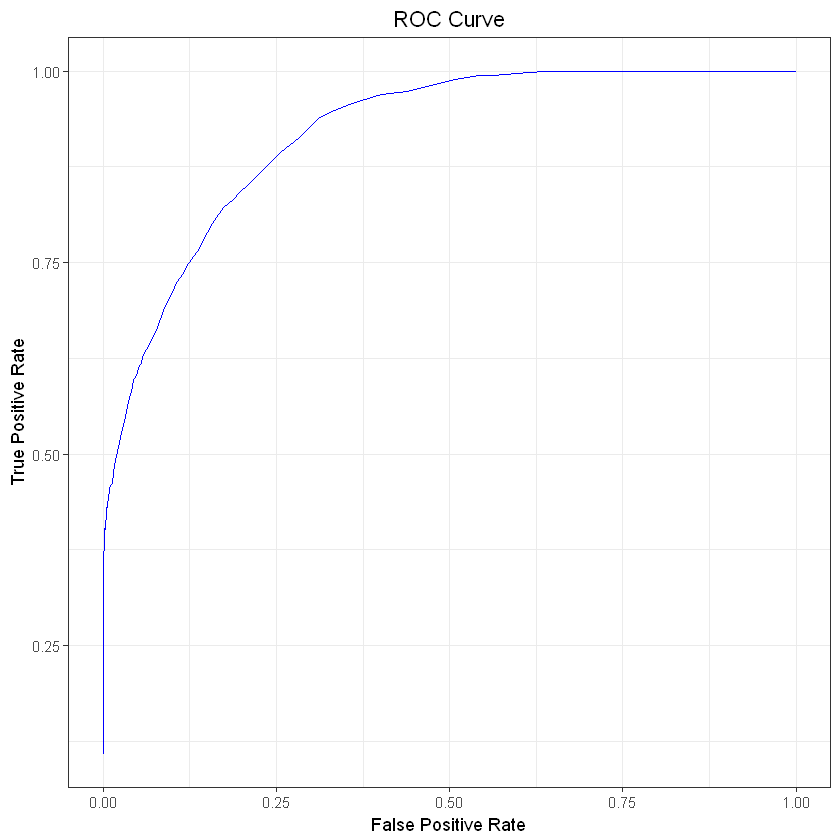

In [16]:
library(ggplot2)

ggplot() +
  geom_line(data=results_gb$ROCInfo, aes( x=as.numeric(FPR), y=as.numeric(Sensitivity)),color='blue') + ggtitle('ROC Curve') + 
  labs(x = 'False Positive Rate', y = 'True Positive Rate') + theme_bw() + theme(plot.title = element_text(hjust = 0.5))

In [7]:
# Load the neural network actionset
loadActionSet(session, 'neuralNet')

# Train the decision tree model
cas.neuralNet.annTrain(train,
                          hiddens=2,
                          acts='TANH',
                          combs='LINEAR',
                          targetAct='SOFTMAX',
                          errorFunc='ENTROPY',
                          std='MIDRANGE',
                          randDist='UNIFORM',
                          scaleInit=1,
                          target   = target, 
                          inputs   = c(num_input, char_input), 
                          nominals = c(char_input, "readmit"),
                          casOut   = list(name = 'nn_R', replace = TRUE)
)

NOTE: Added action set 'neuralNet'.
NOTE: Information for action set 'neuralNet':
NOTE:    neuralNet
NOTE:       annTrain - Trains an artificial neural network
NOTE:       annScore - Scores a table using an artificial neural network model
NOTE:       annCode - Generates DATA step scoring code from an artificial neural network model


$ConvergenceStatus
                                          Reason
1 The optimization exited on maximum iterations.

$ModelInfo
                         Descr        Value
1                        Model   Neural Net
2  Number of Observations Used       112747
3  Number of Observations Read       112747
4     Target/Response Variable      READMIT
5              Number of Nodes           19
6        Number of Input Nodes           15
7       Number of Output Nodes            2
8       Number of Hidden Nodes            2
9      Number of Hidden Layers            1
10 Number of Weight Parameters           32
11   Number of Bias Parameters            4
12                Architecture          MLP
13       Number of Neural Nets            1
14             Objective Value 1.8950790418

$OptIterHistory
   Progress Objective     Loss  FitError
1         1  2.769757 2.769757 0.3698546
2         2  1.988284 1.988284 0.1944708
3         3  1.944686 1.944686 0.1944708
4         4  1.920516 1.920516 0.1944708
5         5  1.909217 1.909217 0.1944708
6         6  1.902998 1.902998 0.1944708
7         7  1.902068 1.902068 0.1944708
8         8  1.901197 1.901197 0.1944708
9         9  1.898334 1.898334 0.1944708
10       10  1.895079 1.895079 0.1944708

$OutputCasTables
               casLib Name Rows Columns
1 CASUSERHDFS(anddwi) nn_R   34      15

In [8]:
# Score the validation data
cas.neuralNet.annScore(valid,
                             modelTable   = list(name = 'nn_R'),
                             copyVars     = list(target, '_PartInd_','DISCHARGED_TO','order_set_used', 'LENGTH_OF_STAY', 'Num_Chronic_Cond', 'PatientAge'),
                             assessonerow = TRUE,
                             casOut       = list(name = 'nn_R_scored', replace = T)
)


cas.table.columnInfo(session,table ="nn_R_scored" )


# Assess the decision tree model
results_nn <- cas.percentile.assess(session,
                                        table="nn_R_scored",
                                        inputs   = c('_NN_P_Y'),
                                        response = target,
                                        event    = 'Y'
)

$OutputCasTables
               casLib        Name  Rows Columns
1 CASUSERHDFS(anddwi) nn_R_scored 48320      11

$ScoreInfo
                        Descr                            Value
1 Number of Observations Read                            48320
2 Number of Observations Used                            48320
3 Misclassification Error (%)                     19.447433775

Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
READMIT,,1,char,1,1,,0,0
_PartInd_,Partition Indicator,2,double,8,12,,0,0
DISCHARGED_TO,Discharged To,3,char,30,30,$CHAR,30,0
order_set_used,,4,double,8,12,,0,0
LENGTH_OF_STAY,Length of Stay,5,double,8,12,BEST,12,0
Num_Chronic_Cond,Comorbidity Count,6,double,8,12,F,12,0
PatientAge,,7,double,8,12,,0,0
_NN_PredName_,,8,char,1,1,$,0,0
_NN_PredP_,,9,double,8,12,BEST,0,0
_NN_P_N,,10,double,8,12,BEST,0,0


In [10]:
cas.table.promote(session,caslib="CASUSERHDFS",name="nn_R_scored")

list()

In [11]:
head(defCasTable(session,caslib='CASUSERHDFS',"gradboost_R_scored"))

READMIT,_PartInd_,_GBT_PredName_,_GBT_PredP_,_GBT_PredLevel_,_MissIt_,_GBT_P_N,_GBT_P_Y
Y,0,N,0.7469958,0,1,0.7469958,0.2530042371
Y,0,Y,0.8789613,1,0,0.1210387,0.8789613115
N,0,N,0.8711282,0,0,0.8711282,0.1288718337
N,0,N,0.8876370,0,0,0.8876370,0.1123629979
N,0,N,0.9993822,0,0,0.9993822,0.0006178178
N,0,N,0.9880290,0,0,0.9880290,0.0119709862


### End the CAS Session

In [4]:
cas.session.endSession(session)

list()